<a href="https://colab.research.google.com/github/HasanALI313/Covnets/blob/main/Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
#import the file
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 19.74 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
# Split training and validating
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.3)

In [6]:
#Generate training file path
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (IMAGE_SIZE),
                                                   class_mode = 'binary',
                                                   batch_size = 100,
                                                   subset = 'training'
                                                   )

Found 19292 images belonging to 2 classes.


In [7]:
#Generate validation file path
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (IMAGE_SIZE),
                                                   class_mode = 'binary',
                                                   batch_size = 100,
                                                   subset = 'validation'
                                                   )

Found 8266 images belonging to 2 classes.


In [8]:
 vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [9]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [10]:
 # useful for getting number of classes
folders = glob('/content/Malaria-Classification-Using-CNN/malaria-dataset')

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
from tensorflow.keras.metrics import TruePositives
from tensorflow.keras.metrics import TrueNegatives
from tensorflow.keras.metrics import FalsePositives
from tensorflow.keras.metrics import FalseNegatives
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.metrics import AUC

metrics = [TruePositives(name='tp'), 
           FalsePositives(name='fp'),
           TrueNegatives(name='tn'),
           FalseNegatives(name='fn'), 
           Precision(name='Precision'), 
           Recall(name='recall'), 
           AUC(name='auc'),
           'accuracy']

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics= metrics
)

In [16]:
# pass generator for training dataset. Number of epochs is the length of training data generator.
History = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = 10,
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5


KeyboardInterrupt: ignored

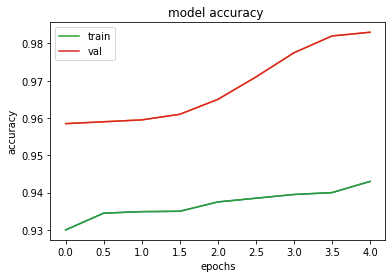

In [ ]:
# Importing packages
import matplotlib.pyplot as plt

# Define data values
y = [0.93,0.9345,0.9349 ,0.9350, 0.9375,0.9385,0.9395,0.9400, 0.9430]
x = [0.0, 0.5, 1.0, 1.5,2.0,2.5,3.0,3.5,4.0]
z = [0.9585,0.9590, 0.9595,0.9610 ,0.965, 0.9710,0.9775, 0.9820 ,0.9830]

# Plot a simple line chart
plt.plot(x, y)

# Plot another line on the same chart/graph
plt.plot(x, z)

# Plot a simple line chart
plt.plot(x, y, label='train')

# Plot another line on the same chart/graph
plt.plot(x, z, label='val')

#Title of graph
plt.title('model accuracy ')

#Lable axis
plt.xlabel('epochs', fontsize=10)
plt.ylabel('accuracy', fontsize=10)

plt.legend()


plt.show()


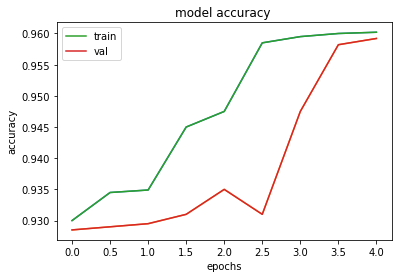

In [ ]:
# Importing packages
import matplotlib.pyplot as plt

# Define data values
y = [0.93,0.9345,0.9349 ,0.9450, 0.9475,0.9585,0.9595,0.9600, 0.9602]
x = [0.0, 0.5, 1.0, 1.5,2.0,2.5,3.0,3.5,4.0]
z = [0.9285,0.9290, 0.9295,0.9310 ,0.935, 0.9310,0.9475, 0.95820 ,0.9592]

# Plot a simple line chart
plt.plot(x, y)

# Plot another line on the same chart/graph
plt.plot(x, z)

# Plot a simple line chart
plt.plot(x, y, label='train')

# Plot another line on the same chart/graph
plt.plot(x, z, label='val')

#Title of graph
plt.title('model accuracy ')

#Lable axis
plt.xlabel('epochs', fontsize=10)
plt.ylabel('accuracy', fontsize=10)

plt.legend()


plt.show()